### 11849060 谭树杰
# Class Project 4-1 #

### 2D case
#### run in python3

In [16]:
import numpy as np
mu1 = np.array([1, 0])
mu2 = np.array([0, 1])
covM1 = np.array([[1, 0.5], [0.5, 1]])
covM2 = np.array([[1,-0.5],[-0.5,1]])


In [28]:
Z1 = np.repeat(mu1[:,np.newaxis], 100, axis=1).transpose()
# Z1 = Z1.transpose()
Z1.shape

(100, 2)

In [29]:
Z1 = Z1 + np.random.randn(100,2) @ np.linalg.cholesky(covM1).T

In [31]:
Z2 = np.repeat(mu2[:,np.newaxis], 100, axis=1).transpose()
Z2 = Z2 + np.random.randn(100,2) @ np.linalg.cholesky(covM2).T

$$ g_{i}(\mathbf{x})=\mathbf{x}^{t} \mathbf{W}_{i} \mathbf{x}+\mathbf{w}_{i}^{t} \mathbf{x}+w_{i 0}
$$
$$
\begin{array}{c}{\mathbf{W}_{i}=-\frac{1}{2} \boldsymbol{\Sigma}_{i}^{-1}} \\ {\mathbf{w}_{i}=\boldsymbol{\Sigma}_{i}^{-1} \boldsymbol{\mu}_{i}}\end{array}
$$
$$
w_{i 0}=-\frac{1}{2} \boldsymbol{\mu}_{i}^{t} \boldsymbol{\Sigma}_{i}^{-1} \boldsymbol{\mu}_{i}-\frac{1}{2} \ln \left|\boldsymbol{\Sigma}_{i}\right|+\ln P\left(\omega_{i}\right)
$$

In [32]:
W1 = -0.5 * np.linalg.inv(covM1)
w1 = np.linalg.inv(covM1) @ mu1
w10 = -0.5 * mu1.T @ np.linalg.inv(covM1) @ mu1 - \
        -0.5 * np.log(np.linalg.det(covM1)) + np.log(0.5)

In [46]:
Matrix(w1.T)

Matrix([
[  1.33333333333333],
[-0.666666666666667]])

In [55]:
w1

array([ 1.33333333, -0.66666667])

In [54]:
Matrix(w1[:,np.newaxis].T).shape

(1, 2)

In [62]:
Matrix([w10]).shape

(1, 1)

In [64]:
(x.T * Matrix(W1) * x + Matrix(w1[:,np.newaxis].T) * x).shape

(1, 1)

In [65]:
from sympy import symbols
from sympy import Matrix
import sympy
u, v = symbols('u v')
x = Matrix([u, v])
g1 = x.T * Matrix(W1) * x + Matrix(w1[:,np.newaxis].T) * x + Matrix([w10])

In [66]:
g1

Matrix([[u*(-0.666666666666667*u + 0.333333333333333*v) + 1.33333333333333*u + v*(0.333333333333333*u - 0.666666666666667*v) - 0.666666666666667*v - 1.5036548834525]])

In [35]:
Mu1

array([u, v], dtype=object)

In [73]:
W2 = -0.5 * np.linalg.inv(covM2)
w2 = np.linalg.inv(covM2) @ mu2
w20 = -0.5 * mu2.T @ np.linalg.inv(covM2) @ mu2 - \
        -0.5 * np.log(np.linalg.det(covM2)) + np.log(0.5)

# uu, vv = symbols('uu vv')
# x = Matrix([uu, vv])
g2 = x.T * Matrix(W2) * x + Matrix(w2[:,np.newaxis].T) * x + Matrix([w20])

In [76]:
g_bound = g1 - g2

In [77]:
g_bound

Matrix([[-u*(-0.666666666666667*u - 0.333333333333333*v) + u*(-0.666666666666667*u + 0.333333333333333*v) + 0.666666666666667*u - v*(-0.333333333333333*u - 0.666666666666667*v) + v*(0.333333333333333*u - 0.666666666666667*v) - 2.0*v]])

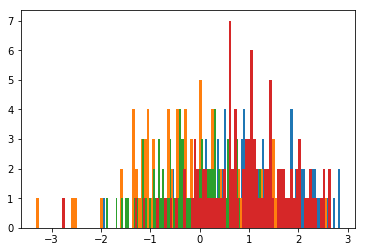

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

n, bins1, _ = plt.hist(Z1[:,0], 100)
n, bins2, _ = plt.hist(Z1[:,1], 100)
x1, y1 = np.meshgrid(bins1, bins2)
n, bins1, _ = plt.hist(Z2[:,0], 100)
n, bins2, _ = plt.hist(Z2[:,1], 100)
x2, y2 = np.meshgrid(bins1, bins2)

In [5]:
def gausspdf(x, mu, sigma):
    d = len(x)
    det = np.linalg.det(sigma)
    A = (2 * np.pi)**(d/2) * np.sqrt(det) # scalar
    B = (x-mu) @ np.linalg.inv(sigma) @ (x-mu)
    p = 1 / A * np.exp(- B / 2)
    return p
    

In [126]:
# decision boundary equation
sympy.simplify(g_bound)

Matrix([[1.33333333333333*u*v + 0.666666666666667*u - 2.0*v]])

In [123]:
z1 = np.zeros_like(x1)
z2 = np.zeros_like(x2)
z_bound = np.zeros_like(x1)
for i in range(x1.shape[0]):
    for j in range(y1.shape[0]):
        z1[i,j] = gausspdf([x1[i,j], y1[i,j]], mu1, covM1)
        z2[i,j] = gausspdf([x2[i,j], y2[i,j]], mu2, covM2)
        z_bound[i,j] = g_bound.subs([(u, x1[i,j]), (v, y1[i,j])])[0,0]
        

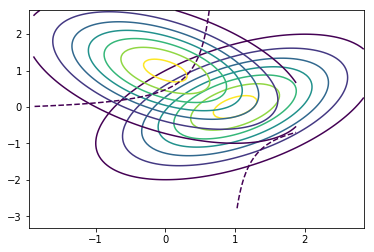

In [128]:
plt.contour(x1,y1,z1)
plt.contour(x2,y2,z2)
plt.contour(x2,y2,z_bound,[0],linestyles="dashed")
plt.show()

In [130]:
len(bins1)

101

In [133]:
# calculate type I errors and type II errors
err1 = err2 = 0
for i in range(len(x1)):
    for j in range(len(y1)):
        if g_bound.subs([(u, x1[i,j]), (v, y1[i,j])])[0,0] > 0:
            err1 = err1 + 1
        if g_bound.subs([(u, x1[i,j]), (v, y1[i,j])])[0,0] < 0:
            err2 = err2 + 1

In [135]:
n_samples = len(x1) * len(y1)
print("err1", err1 / n_samples)
print("err2", err2 / n_samples)

err1 0.654249583374179
err2 0.345750416625821


### 3D case

In [1]:
from __future__ import print_function
from __future__ import division
from builtins import int
import future        # pip install future
import builtins      # pip install future
import past          # pip install future
import six           # pip install six
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import symbols
from sympy import Matrix
import sympy

mu1 = np.array([2,0,0])
mu2 = np.array([0,2,2])
covM1 = np.array([[5,2,1], [2,5,0],[1,0,4]])
covM2 = np.array([[2,2,1],[2,4,0],[1,0,5]])
Z1 = np.repeat(mu1[:,np.newaxis], 100, axis=1).transpose()
Z1 = Z1 + np.random.randn(100,3) @ np.linalg.cholesky(covM1).T
Z2 = np.repeat(mu2[:,np.newaxis], 100, axis=1).transpose()
Z2 = Z2 + np.random.randn(100,3) @ np.linalg.cholesky(covM2).T

W1 = -0.5 * np.linalg.inv(covM1)
w1 = np.linalg.inv(covM1) @ mu1
w10 = -0.5 * mu1.T @ np.linalg.inv(covM1) @ mu1 - \
        -0.5 * np.log(np.linalg.det(covM1)) + np.log(0.5)

u, v, t = symbols('u v t')
x = Matrix([u, v, t])

g1 = x.T * Matrix(W1) * x + Matrix(w1[:,np.newaxis].T) * x + Matrix([w10])
W2 = -0.5 * np.linalg.inv(covM2)
w2 = np.linalg.inv(covM2) @ mu2
w20 = -0.5 * mu2.T @ np.linalg.inv(covM2) @ mu2 - \
        -0.5 * np.log(np.linalg.det(covM2)) + np.log(0.5)

# uu, vv = symbols('uu vv')
# x = Matrix([uu, vv])
g2 = x.T * Matrix(W2) * x + Matrix(w2[:,np.newaxis].T) * x + Matrix([w20])

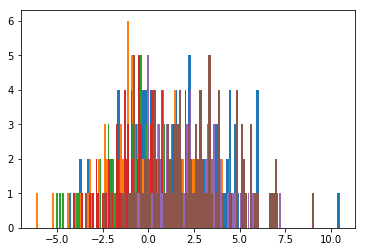

In [3]:
n, bins1, _ = plt.hist(Z1[:,0], 100)
n, bins2, _ = plt.hist(Z1[:,1], 100)
n, bins3, _ = plt.hist(Z1[:,2], 100)
x1, y1, z1 = np.meshgrid(bins1, bins2, bins3)
n, bins1, _ = plt.hist(Z2[:,0], 100)
n, bins2, _ = plt.hist(Z2[:,1], 100)
n, bins3, _ = plt.hist(Z2[:,2], 100)
x2, y2, z2 = np.meshgrid(bins1, bins2, bins3)

In [6]:
g_bound = g1 - g2
zd1 = np.zeros_like(x1)
zd2 = np.zeros_like(x2)
z_bound = np.zeros_like(x1)
for i in range(x1.shape[0]):
    for j in range(y1.shape[0]):
    	for k in range(z1.shape[0]):
	        zd1[i,j,k] = gausspdf([x1[i,j,k], y1[i,j,k],z1[i,j,k]], mu1, covM1)
	        zd2[i,j,k] = gausspdf([x2[i,j,k], y2[i,j,k],z1[i,j,k]], mu2, covM2)
# 	        z_bound[i,j,k] = g_bound.subs([(u, x1[i,j,k]), (v, y1[i,j,k]), (t, z1[i,j,k])])[0,0,0]

In [7]:
for i in range(x1.shape[0]):
    for j in range(y1.shape[0]):
    	for k in range(z1.shape[0]):
	        z_bound[i,j,k] = g_bound.subs([(u, x1[i,j,k]), (v, y1[i,j,k]), (t, z1[i,j,k])])[0,0]

In [153]:
z_bound.shape

(101, 101, 101)

In [154]:
g_bound.subs([(u, x1[i,j,k]), (v, y1[i,j,k]), (t, z1[i,j,k])])

Matrix([[12.5299808090387]])

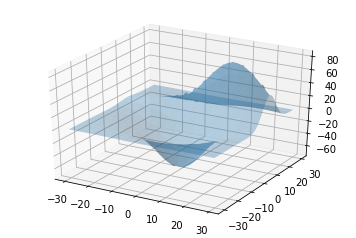

In [173]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

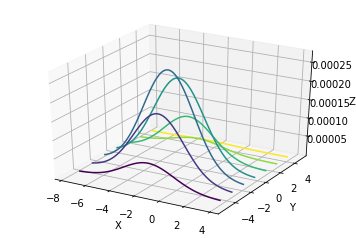

In [212]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.contour(x1[0,:,:], y1[0,:,:], z1[0,:,:], zd1[x1[0,0,0],:,:])
# ax.contour(zd1[0,:,:], y1[0,:,:], z1[0,:,:], zdir='x')
# ax.contour(zd1[50,:,:], y1[50,:,:], z1[50,:,:],zdir='x')
# ax.contour(zd1[:,0,:], y1[:,0,:], z1[:,0,:], zdir='x')
# ax.contour(zd1[:,25,:], y1[:,25,:], z1[:,25,:], zdir='x')
# ax.contour(zd1[:,50,:], y1[:,50,:], z1[:,50,:], zdir='x')
# ax.contour(zd1[:,100,:], y1[:,100,:], z1[:,100,:], zdir='x')
# ax.contour(zd2[:,0,:], y2[:,0,:], z2[:,0,:], zdir='x')
ax.contour(y1[:,0,:], z1[:,0,:],zd1[:,0,:], zdir='y')
ax.set_xlabel('X')
# ax.set_xlim(-8, 4)
ax.set_ylabel('Y')
# ax.set_ylim(-8, 4)
ax.set_zlabel('Z')
# ax.set_zlim(-10, 100)
plt.show()

In [179]:
z1[:10,0,0]

array([-5.39282986, -5.39282986, -5.39282986, -5.39282986, -5.39282986,
       -5.39282986, -5.39282986, -5.39282986, -5.39282986, -5.39282986])

In [196]:
x1[0,0:5,0]

array([-3.70995935, -3.59588291, -3.48180647, -3.36773004, -3.2536536 ])

In [197]:
y1[0:5,0,0]

array([-7.69679628, -7.58151327, -7.46623026, -7.35094725, -7.23566424])

In [190]:
print(np.max(x1))
print(np.min(x1))

7.697684338105888
-3.709959348141341


### Class project 4-2

In [14]:
# calculate type I errors and type II errors
g_bound.subs([(u, x1[i,j,k]), (v, y1[i,j,k]), (t, z1[i,j,k])])
err1 = err2 = 0
for i in range(len(x1)):
    for j in range(len(y1)):
        for k in range(len(z1)):
            if g_bound.subs([(u, x1[i,j,k]), (v, y1[i,j,k]), (t, z1[i,j,k])])[0,0] > 0:
                err1 = err1 + 1
            if g_bound.subs([(u, x1[i,j,k]), (v, y1[i,j,k]), (t, z1[i,j,k])])[0,0] < 0:
                err2 = err2 + 1

In [16]:
n_samples = len(x1) * len(y1)
print("err1", err1 / n_samples)
print("err2", err2 / n_samples)

err1 93.33232036074895
err2 7.667679639251054
